# Camada Prata - CoinMarketCap Cryptocurrency Dataset 2023

Neste arquivo analizaremos os dados que foram obtidos através da plataforma [Kaggle](https://www.kaggle.com/) e tratados no ETL para a camada Prata.

# Análise Exploratória dos Dados Brutos

Nesta seção, utilizaremos Python e suas bibliotecas especializadas para realizar uma análise exploratória completa do dataset tratado no ETL. As principais ferramentas que empregaremos são **Pandas** e **Numpy**.

## 1. Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import sql
from psycopg2.extras import execute_values
from dotenv import load_dotenv
import os
from pathlib import Path

## 2. Carregamento do Dataset

In [ ]:
dotenv_path = Path('../../.env')
load_dotenv(dotenv_path=dotenv_path, override = True)

def get_connection():
    try:
        return psycopg2.connect(
            host=os.getenv('DB_HOST','localhost'),
            database=os.getenv('POSTGRES_DB','postgres'),
            user=os.getenv('POSTGRES_USER','postgres'),
            password=os.getenv('POSTGRES_PASSWORD','postgres'),
            port=os.getenv('DB_PORT', 5432)
        )
    except psycopg2.Error as e:
        print(f"Falha ao conectar ao banco de dados: {e}")
        raise

print("Configuração inicial concluída.")

print("Extraindo dados da tabela 'public.currencies_data'...")
df = None
try:
    with get_connection() as conn:
        df = pd.read_sql_query("SELECT * FROM public.currencies_data", conn)
    
    if df is None or df.empty:
        raise Exception("A tabela Silver 'public.currencies_data' está vazia ou não foi carregada.")
    
    print(f"{len(df)} linhas extraídas da Silver.")

except Exception as e:
    print(f"Erro ao extrair dados da Silver: {e}")
    raise

Configuração inicial concluída.
Extraindo dados da tabela 'public.currencies_data'...


/var/folders/lm/hggthbjj48lg6t_sffskgd800000gp/T/ipykernel_2098/1363456322.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM public.currencies_data", conn)


20225 linhas extraídas da Silver.


## 3. Visualização Inicial dos Dados

Examinamos de maneira breve o dataframe utilizado:

In [18]:
df

,cmc_rank,name,symbol,market_pair_count,circulating_supply,total_supply,max_supply,is_active,last_updated,date_added,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,fully_dillutted_market_cap,market_cap_by_total_supply,dominance,ytd_price_change_percentage
0,1,Bitcoin,USD,10442,1.947631e+07,1.947631e+07,2.100000e+07,True,2023-09-04 14:57:00+00,2010-07-13 00:00:00+00,...,-0.151618,-0.286439,-1.011075,-11.014572,-14.243425,-0.602343,5.427690e+11,5.033874e+11,48.3538,55.4648
1,2,Ethereum,USD,7329,1.202177e+08,1.202177e+08,inf,True,2023-09-04 14:57:00+00,2015-08-07 00:00:00+00,...,-0.231393,-0.394296,-1.167014,-11.139750,-13.168089,-11.297800,1.958790e+11,1.958790e+11,18.8155,35.6717
2,3,Tether USDt,USD,61319,8.290017e+10,8.543720e+10,inf,True,2023-09-04 14:57:00+00,2015-02-25 00:00:00+00,...,-0.018710,-0.020663,0.011400,0.068201,-0.040030,-0.041019,8.540772e+10,8.540772e+10,7.9604,-0.0037
3,4,BNB,USD,1605,1.538500e+08,1.538500e+08,inf,True,2023-09-04 14:57:00+00,2017-07-25 00:00:00+00,...,-0.177729,0.479339,-1.317269,-10.890590,-8.878355,-22.728145,3.315388e+10,3.315388e+10,3.1847,-11.7320
4,5,XRP,USD,1061,5.297770e+10,9.998846e+10,1.000000e+11,True,2023-09-04 14:57:00+00,2013-08-04 00:00:00+00,...,-0.102062,0.156371,-3.182004,-19.955193,7.952432,-1.844853,5.024069e+10,5.023489e+10,2.5567,48.3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,9280,DeFido,USD,2,0.000000e+00,1.000000e+08,1.000000e+08,True,2023-09-04 15:00:00+00,2023-08-09 11:56:51+00,...,0.000000,0.000000,-1.250495,-81.643051,-81.643051,-81.643051,1.753517e+04,1.753517e+04,0.0000,0.0000
20221,9281,GunBet,USD,2,0.000000e+00,1.000000e+07,1.000000e+07,True,2023-09-04 15:00:00+00,2023-08-10 07:15:33+00,...,0.000000,0.000000,-8.083381,-98.944749,-98.944749,-98.944749,1.631004e+04,1.631004e+04,0.0000,0.0000
20222,9282,MosesCoin,USD,1,0.000000e+00,1.000000e+12,1.000000e+12,True,2023-09-04 15:00:00+00,2023-08-18 13:02:53+00,...,0.000000,-0.161447,-48.158507,-73.641855,-73.641855,-73.641855,9.142545e+04,9.142545e+04,0.0000,0.0000
20223,9283,Shibarium Token,USD,1,0.000000e+00,1.000000e+09,1.000000e+09,True,2023-09-04 15:00:00+00,2023-08-21 14:14:42+00,...,0.000000,0.000000,-0.440193,-6.455954,-6.455954,-6.455954,7.758348e+05,7.758348e+05,0.0000,0.0000


## 4. Informações Estruturais do Dataset

Analisamos os tipos de dados de cada coluna e identificamos valores ausentes:

In [19]:
# Informações gerais sobre o dataset
print("=" * 80)
print("INFORMAÇÕES ESTRUTURAIS DO DATASET")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("TIPOS DE DADOS POR COLUNA")
print("=" * 80)
print(df.dtypes)

print("\n" + "=" * 80)
row, col = df.shape
print(f'Número de tuplas: {row} | Número de Colunas: {col}')
print("=" * 80)

INFORMAÇÕES ESTRUTURAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20225 entries, 0 to 20224
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cmc_rank                     20225 non-null  int64  
 1   name                         20225 non-null  object 
 2   symbol                       20225 non-null  object 
 3   market_pair_count            20225 non-null  int64  
 4   circulating_supply           20225 non-null  float64
 5   total_supply                 20225 non-null  float64
 6   max_supply                   20225 non-null  float64
 7   is_active                    20225 non-null  bool   
 8   last_updated                 20225 non-null  object 
 9   date_added                   20225 non-null  object 
 10  price                        20225 non-null  float64
 11  volume_24h                   20225 non-null  float64
 12  market_cap                   20225 non-

Observamos que existe a nomenclatura `object` como tipo de dado, que no Pandas representa strings ou misturas de tipos.

## 5. Análise de Valores Ausentes

Identificamos e quantificamos valores Nulos e ausentes em cada coluna:

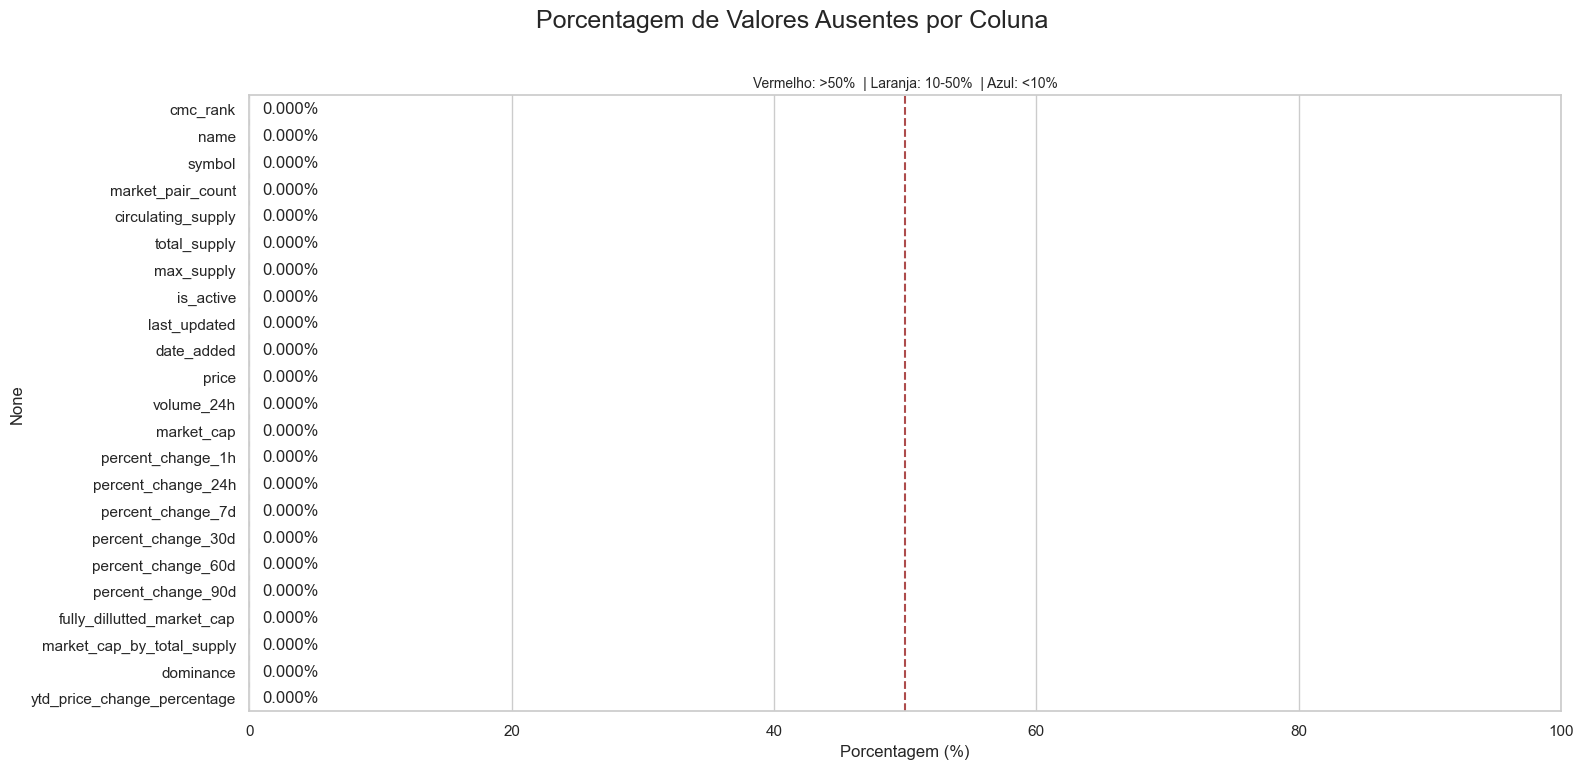

In [20]:
null_perc = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

colors = ['#d9534f' if v > 50 else '#f0ad4e' if v > 10 else '#5bc0de' for v in null_perc.values]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=null_perc.values, y=null_perc.index, hue=null_perc.index, palette=colors, legend=False)

plt.suptitle("Porcentagem de Valores Ausentes por Coluna", fontsize=18, y=0.96)
ax.set_title("Vermelho: >50%  | Laranja: 10-50%  | Azul: <10%", fontsize=10)
ax.set_xlabel("Porcentagem (%)")
ax.set_xlim(0, 100)

for p in ax.patches:
    w = p.get_width()
    ax.text(w + 1, p.get_y() + p.get_height()/2, f'{w:.3f}%', va='center')

ax.axvline(50, color='darkred', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Observamos que o etl foi bem realizado, já que não se encontram mais valores nulos na tabela.

## 6. Estatísticas Descritivas

Examinamos as estatísticas descritivas das colunas numéricas:

In [21]:

print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS")
print("=" * 80)
df.describe()

ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS


/Users/henriquenino/Projetos_Faculdade/sbd2-cryptocurrency-data-analysis/env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,cmc_rank,market_pair_count,circulating_supply,total_supply,max_supply,price,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,fully_dillutted_market_cap,market_cap_by_total_supply,dominance,ytd_price_change_percentage
count,20225.000000,20225.000000,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,20225.000000,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,20225.000000,2.022500e+04
mean,3728.960939,33.775080,2.645468e+14,2.756373e+16,inf,1.616499e+02,4.363723e+06,9.086838e+07,0.087750,4.392312e+02,4.900382e+07,6.764043e+04,8.068954e+08,3.824055e+08,2.976591e+13,2.931487e+13,0.007828,2.883132e+07
std,2441.492468,679.670767,1.245398e+16,1.235851e+18,NaN,6.016728e+03,1.884639e+08,4.170284e+09,20.836000,3.501207e+04,4.927660e+09,6.129599e+06,1.011538e+11,4.142888e+10,2.577276e+15,2.576509e+15,0.399571,2.034154e+09
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.140000e-22,0.000000e+00,0.000000e+00,-95.583328,-9.815875e+01,-9.984594e+01,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000,-1.000000e+02
25%,1689.000000,3.000000,0.000000e+00,1.751392e+07,1.000000e+08,2.010689e-04,1.009521e+02,0.000000e+00,-0.256605,-1.608762e+00,-7.797378e+00,-2.651470e+01,-3.968430e+01,-5.089205e+01,1.447135e+05,6.513543e+04,0.000000,-5.009290e+01
50%,3374.000000,6.000000,0.000000e+00,3.320000e+08,1.000000e+09,4.377096e-03,1.551384e+04,0.000000e+00,-0.126365,-5.046957e-02,-1.629555e+00,-1.287918e+01,-1.841454e+01,-2.651633e+01,1.457192e+06,8.896785e+05,0.000000,-2.529800e+00
75%,5615.000000,14.000000,1.593471e+07,3.300000e+09,1.000000e+15,7.490156e-02,1.134390e+05,1.936761e+05,0.000000,9.759431e-01,1.195330e+00,-9.362853e-01,-3.390338e-01,-2.124451e+00,1.585683e+07,1.194246e+07,0.000000,0.000000e+00
max,9284.000000,61319.000000,9.818468e+17,8.731273e+19,inf,4.756083e+05,1.701102e+10,5.033874e+11,2002.191449,2.874015e+06,4.963326e+11,6.138641e+08,1.423367e+13,5.509612e+12,3.157185e+17,3.157185e+17,48.353800,1.950395e+11


Este comando nos fornece uma visão geral das distribuições, médias, medianas e variações dos principais atributos numéricos do dataset. Essas informações são cruciais para entender o comportamento dos dados e identificar possíveis outliers ou anomalias que já devem ter sido devidamente tratadas.

## 7. Análise de Colunas Categóricas

Identificamos e analisamos as principais colunas categóricas:

In [22]:
print("=" * 80)
print("ANÁLISE DE COLUNAS CATEGÓRICAS")
print("=" * 80)

print("\nTop 10 Símbolos de Criptomoedas Mais Frequentes:")
print(df['symbol'].value_counts().head(10))

print(f"\nTotal de criptomoedas únicas (por nome): {df['name'].nunique()}")
print(f"Total de símbolos únicos: {df['symbol'].nunique()}")

ANÁLISE DE COLUNAS CATEGÓRICAS

Top 10 Símbolos de Criptomoedas Mais Frequentes:
symbol
USD    20225
Name: count, dtype: int64

Total de criptomoedas únicas (por nome): 9193
Total de símbolos únicos: 1
Total de símbolos únicos: 1


## 8. Análise de Duplicatas

Investigamos a presença de registros duplicados:

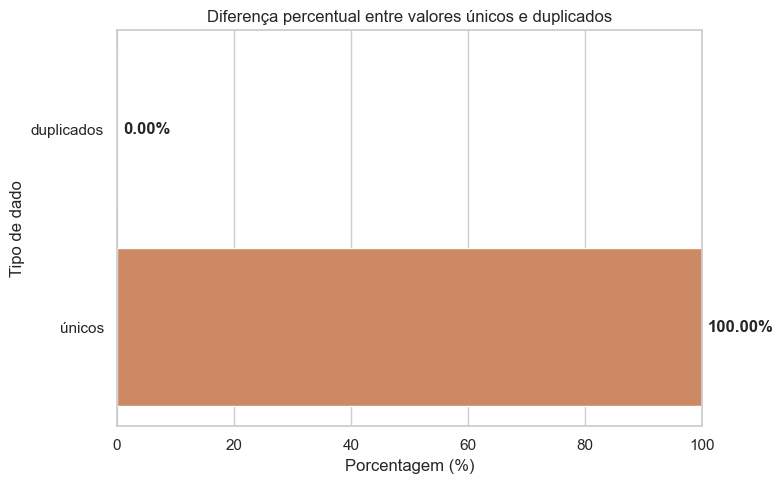

In [23]:
total = len(df)
duplicated = df.duplicated().sum()
unique = total - duplicated

data = {
    'dados': ['duplicados', 'únicos'],
    'total': [duplicated, unique],
}
data['porcentagem'] = [v / total * 100 for v in data['total']]

hue_order = ['duplicados', 'únicos']

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=data,
    x='porcentagem', y='dados',
    hue='dados', hue_order=hue_order,
    dodge=False
)

plt.xlabel("Porcentagem (%)")
plt.ylabel("Tipo de dado")
plt.title('Diferença percentual entre valores únicos e duplicados')

for i, (p, valor) in enumerate(zip(ax.patches, data['porcentagem'])):
    ax.text(p.get_width() + 1, p.get_y() + p.get_height()/2,
            f'{valor:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xlim(0, 100)
plt.yticks([0, 1], data['dados'])

plt.tight_layout()
plt.show()

Observamos que as alterações no ETL foram devidamente realizadas já que não se encontram valores duplicados no Dataset tratado. 

## 9. Análise das Principais Criptomoedas

Examinamos as criptomoedas com maior capitalização de mercado:

TOP 20 CRIPTOMOEDAS POR CAPITALIZAÇÃO DE MERCADO


       cmc_rank                name symbol         price    market_cap    volume_24h  dominance
0             1             Bitcoin    USD  25846.144655  5.033874e+11  9.905321e+09    48.3538
1             2            Ethereum    USD   1629.369141  1.958790e+11  3.448460e+09    18.8155
100           2            Ethereum    USD   1629.274894  1.958677e+11  3.448290e+09    18.8144
2             3         Tether USDt    USD      0.999655  8.287157e+10  1.700783e+10     7.9604
101           3         Tether USDt    USD      0.999538  8.286188e+10  1.701102e+10     7.9595
3             4                 BNB    USD    215.494911  3.315388e+10  3.469035e+08     3.1847
102           4                 BNB    USD    215.491307  3.315333e+10  3.475118e+08     3.1846
4             5                 XRP    USD      0.502407  2.661636e+10  8.179413e+08     2.5567
103           5                 XRP    USD      0.502210  2.660595e+10  8.190013e+08     2.5557
5             6            USD Coin    U

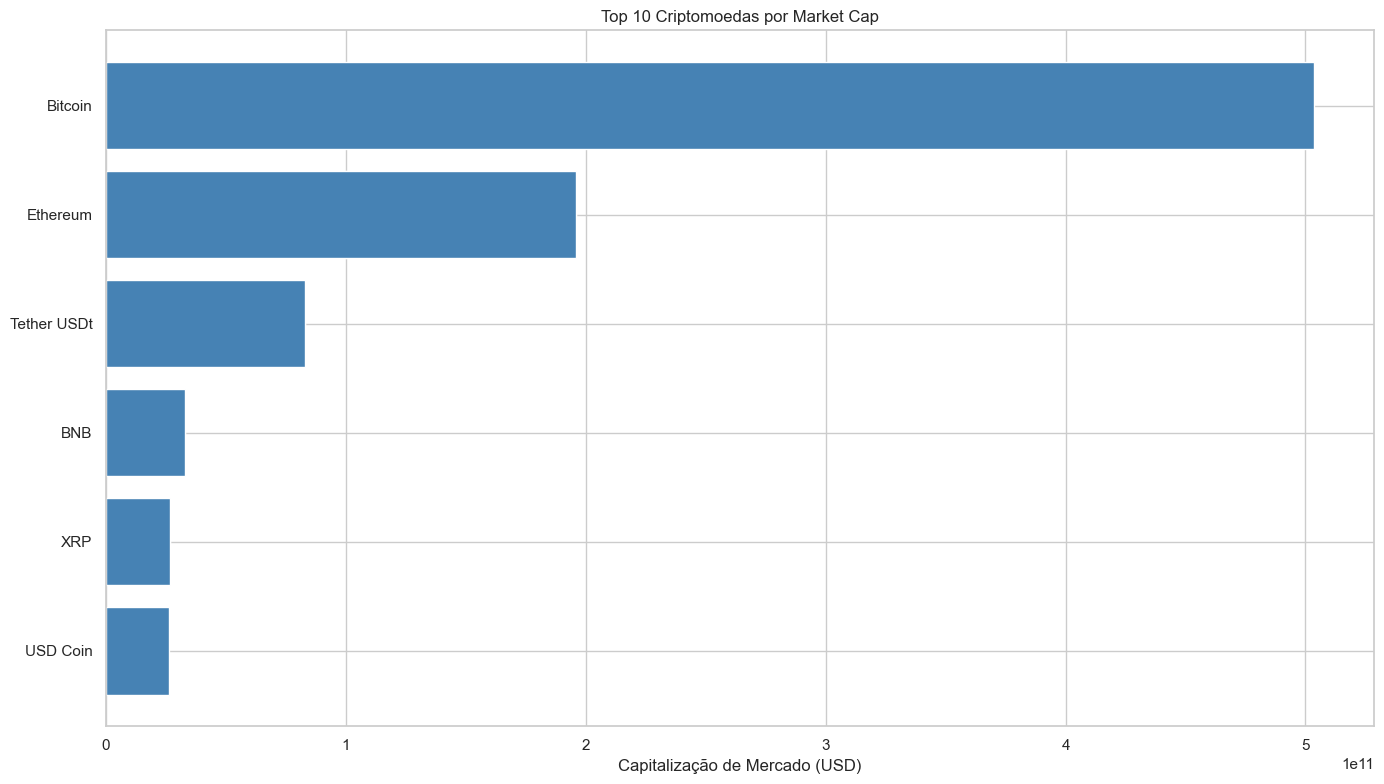

In [24]:
print("=" * 80)
print("TOP 20 CRIPTOMOEDAS POR CAPITALIZAÇÃO DE MERCADO")
print("=" * 80)

top_20 = df.nlargest(20, 'market_cap')[['cmc_rank', 'name', 'symbol', 'price', 
                                         'market_cap', 'volume_24h', 'dominance']]
print(top_20.to_string())

plt.figure(figsize=(14, 8))
top_10 = df.nlargest(10, 'market_cap')
plt.barh(top_10['name'], top_10['market_cap'], color='steelblue')
plt.xlabel('Capitalização de Mercado (USD)')
plt.title('Top 10 Criptomoedas por Market Cap')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 10. Distribuição de Preços e Volumes

Analisamos a distribuição de preços e volumes de negociação:

ANÁLISE DE DISTRIBUIÇÃO DE PREÇOS

Preço médio: $161.65
Preço mediano: $0.00
Preço mínimo: $0.0000000000
Preço máximo: $475608.35
Desvio padrão: $6016.73


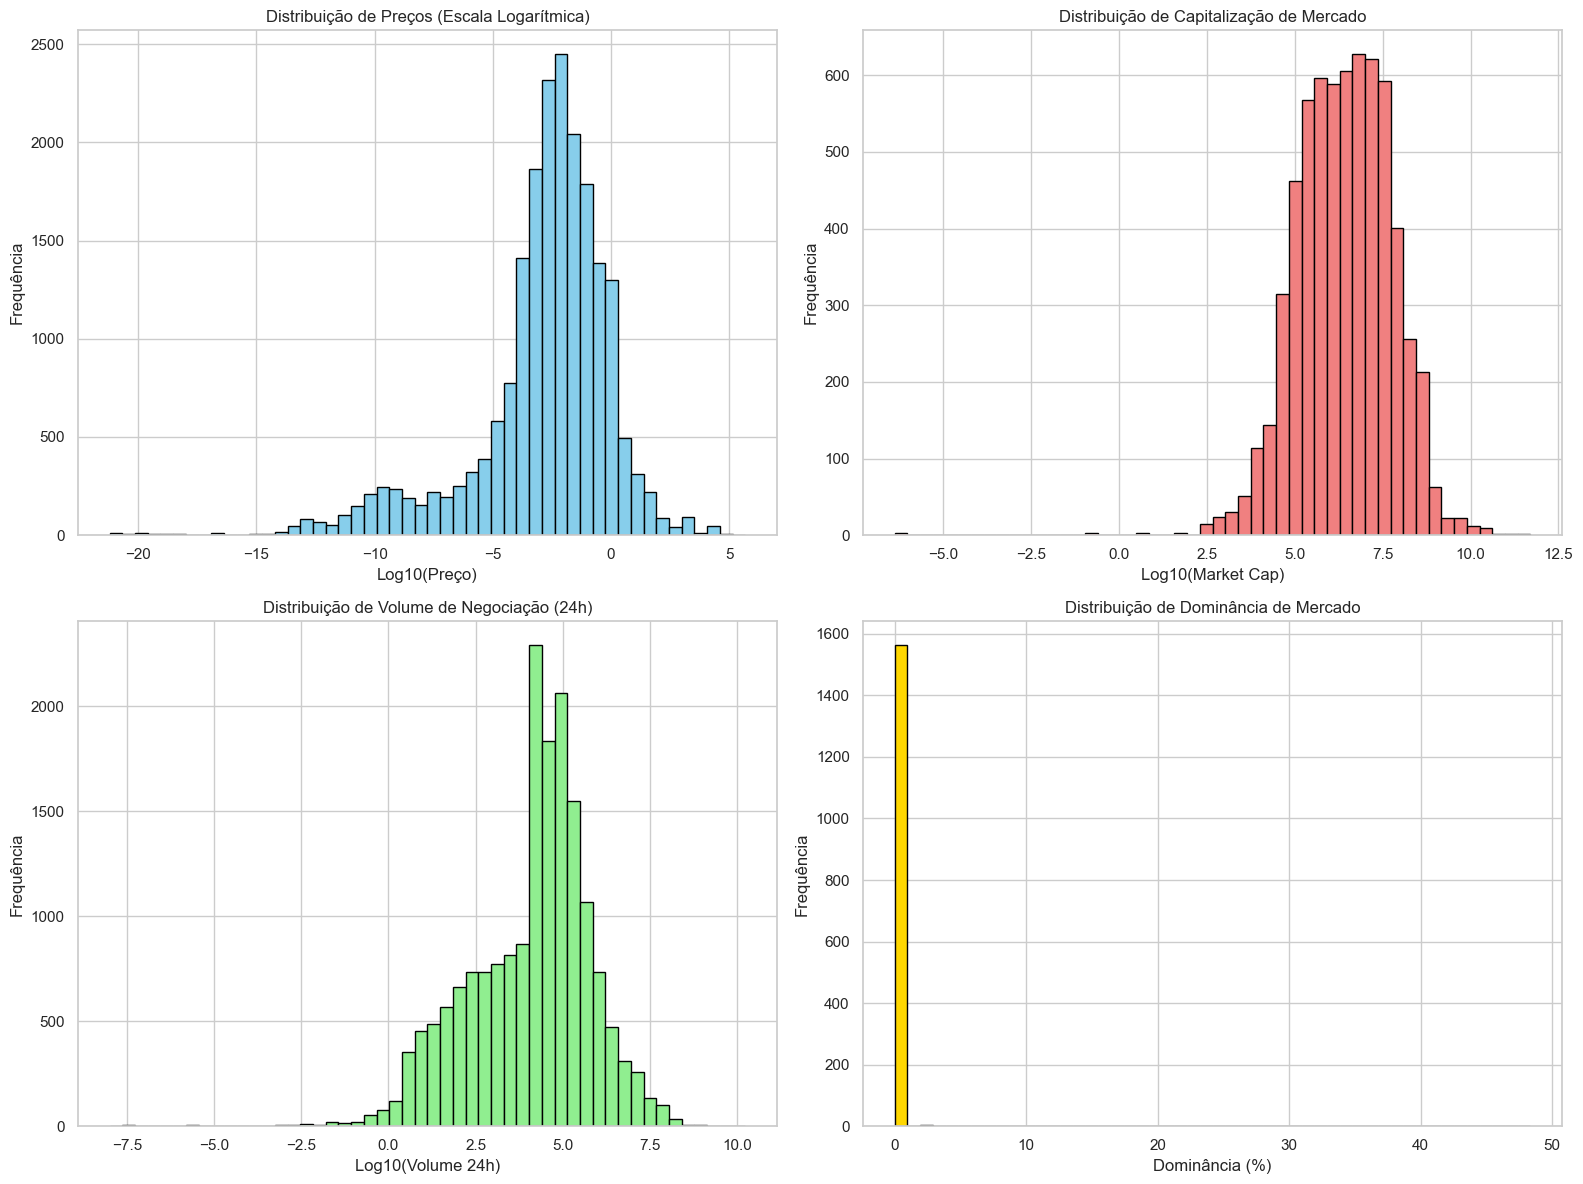

In [25]:
print("=" * 80)
print("ANÁLISE DE DISTRIBUIÇÃO DE PREÇOS")
print("=" * 80)

print(f"\nPreço médio: ${df['price'].mean():.2f}")
print(f"Preço mediano: ${df['price'].median():.2f}")
print(f"Preço mínimo: ${df['price'].min():.10f}")
print(f"Preço máximo: ${df['price'].max():.2f}")
print(f"Desvio padrão: ${df['price'].std():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(np.log10(df['price'][df['price'] > 0]), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Log10(Preço)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Preços (Escala Logarítmica)')

axes[0, 1].hist(np.log10(df['market_cap'][df['market_cap'] > 0]), bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Log10(Market Cap)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Capitalização de Mercado')

axes[1, 0].hist(np.log10(df['volume_24h'][df['volume_24h'] > 0]), bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Log10(Volume 24h)')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição de Volume de Negociação (24h)')

axes[1, 1].hist(df['dominance'][df['dominance'] > 0], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_xlabel('Dominância (%)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição de Dominância de Mercado')

plt.tight_layout()
plt.show()

Esta análise permite entender a distribuição dos principais valores quantitativos individuais do dataset de criptomoedas: preço, capitalização de mercado, volume de negociação em 24 horas e dominância de mercado. Isso é fundamental em datasets financeiros porque preços, volumes e market caps normalmente têm distribuição log-normal, com poucos valores muito grandes e muitos valores pequenos. Uma visualização errada pode esconder padrões ou distorcer qualquer inferência/estatística aplicada.

## 11. Análise de Volatilidade

Examinamos as variações percentuais em diferentes períodos temporais:

ANÁLISE DE VOLATILIDADE - VARIAÇÕES PERCENTUAIS

Estatísticas de Variações Percentuais:
       percent_change_1h  percent_change_24h  percent_change_7d  \
count       20225.000000        2.022500e+04       2.022500e+04   
mean            0.087750        4.392312e+02       4.900382e+07   
std            20.836000        3.501207e+04       4.927660e+09   
min           -95.583328       -9.815875e+01      -9.984594e+01   
25%            -0.256605       -1.608762e+00      -7.797378e+00   
50%            -0.126365       -5.046957e-02      -1.629555e+00   
75%             0.000000        9.759431e-01       1.195330e+00   
max          2002.191449        2.874015e+06       4.963326e+11   

       percent_change_30d  percent_change_60d  percent_change_90d  
count        2.022500e+04        2.022500e+04        2.022500e+04  
mean         6.764043e+04        8.068954e+08        3.824055e+08  
std          6.129599e+06        1.011538e+11        4.142888e+10  
min         -1.000000e+02       -1.0

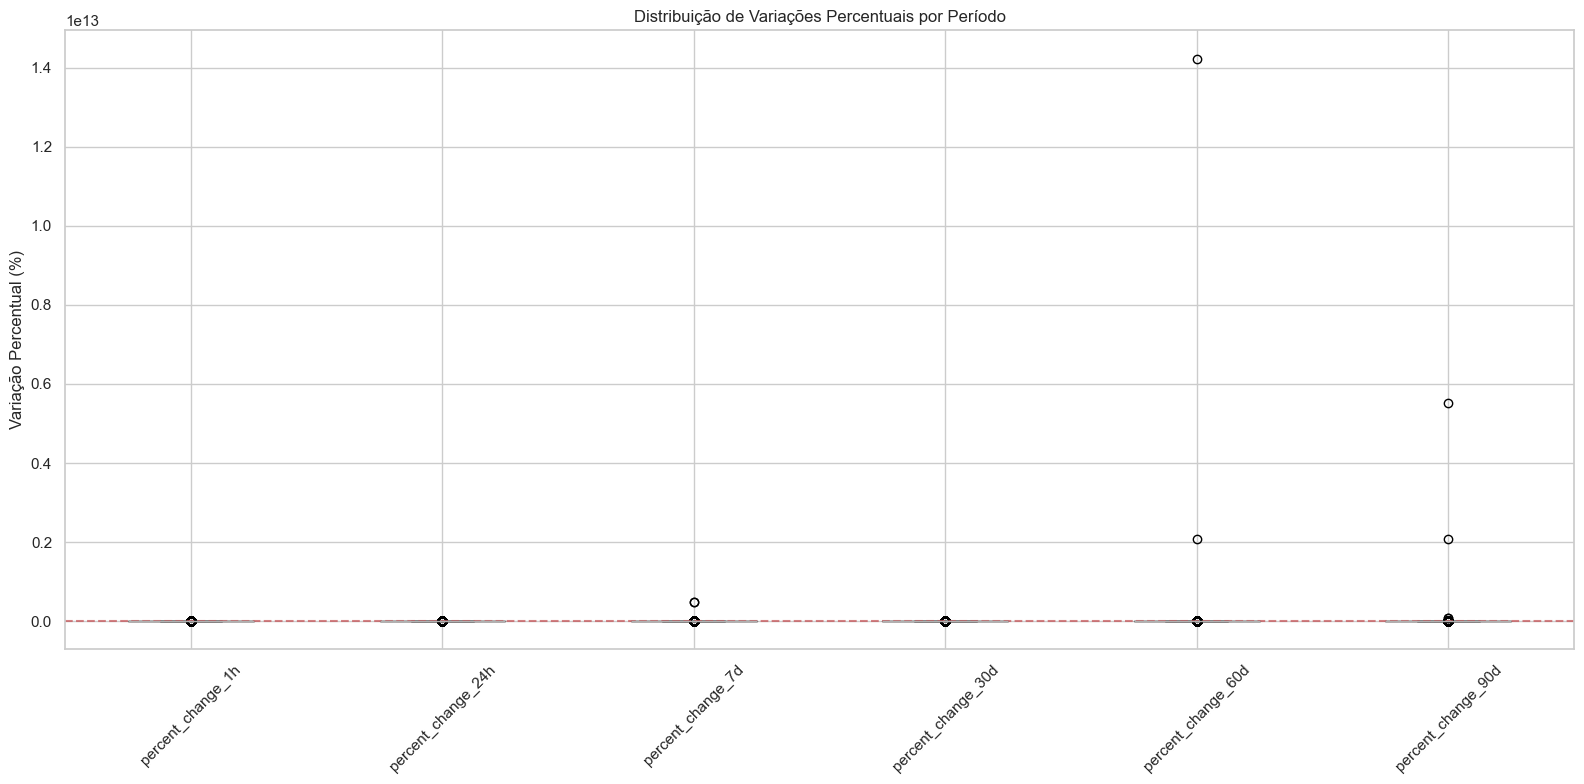


TOP 10 MAIORES GANHOS (24h)
                name symbol     price  percent_change_24h
11917  BitGuild PLAT    USD  0.009196        2.874015e+06
1555   BitGuild PLAT    USD  0.009196        2.873995e+06
4165   BitGuild PLAT    USD  0.009196        2.873936e+06
14825        PumpETH    USD  0.215363        8.650025e+04
9624         PumpETH    USD  0.215359        8.649490e+04
18605          Metis    USD  0.003108        3.092276e+04
14014     Meme Lordz    USD  0.010434        7.420069e+03
8472      Meme Lordz    USD  0.010433        7.419604e+03
12908  Red-Eyed-Frog    USD  0.000132        2.336308e+03
3030   Red-Eyed-Frog    USD  0.000132        2.336234e+03

TOP 10 MAIORES PERDAS (24h)
                                 name symbol         price  percent_change_24h
10939  Mainstream For The Underground    USD  3.180077e-14          -98.158748
17967  Mainstream For The Underground    USD  3.180165e-14          -98.158617
10403               DINGO TOKEN (old)    USD  2.762830e-10         

In [26]:
print("=" * 80)
print("ANÁLISE DE VOLATILIDADE - VARIAÇÕES PERCENTUAIS")
print("=" * 80)

volatility_cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d', 
                   'percent_change_30d', 'percent_change_60d', 'percent_change_90d']

volatility_stats = df[volatility_cols].describe()
print("\nEstatísticas de Variações Percentuais:")
print(volatility_stats)

plt.figure(figsize=(16, 8))
df[volatility_cols].boxplot()
plt.ylabel('Variação Percentual (%)')
plt.title('Distribuição de Variações Percentuais por Período')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("TOP 10 MAIORES GANHOS (24h)")
print("=" * 80)
top_gains = df.nlargest(10, 'percent_change_24h')[['name', 'symbol', 'price', 'percent_change_24h']]
print(top_gains.to_string())

print("\n" + "=" * 80)
print("TOP 10 MAIORES PERDAS (24h)")
print("=" * 80)
top_losses = df.nsmallest(10, 'percent_change_24h')[['name', 'symbol', 'price', 'percent_change_24h']]
print(top_losses.to_string())

## 12. Análise de Correlações

Investigamos correlações entre variáveis numéricas:

ANÁLISE DE CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS


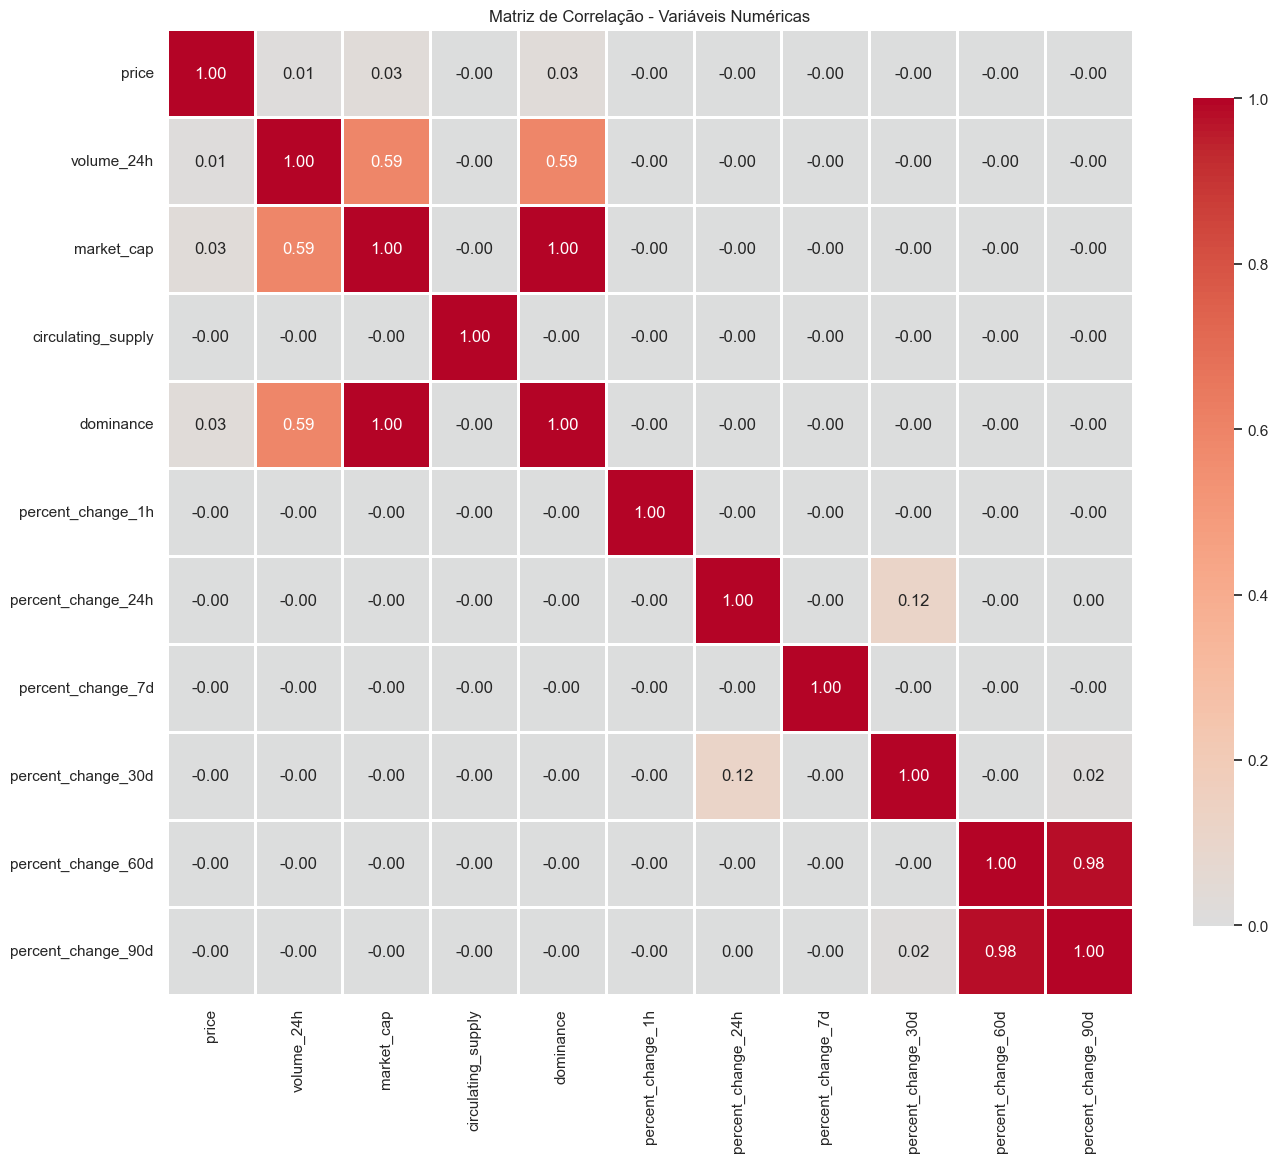


Correlações mais fortes (|r| > 0.5):
market_cap          dominance             0.997423
percent_change_60d  percent_change_90d    0.976555
volume_24h          dominance             0.590933
market_cap          volume_24h            0.589420
dtype: float64


In [27]:
print("=" * 80)
print("ANÁLISE DE CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
print("=" * 80)

numeric_cols = ['price', 'volume_24h', 'market_cap', 'circulating_supply', 
                'dominance'] + volatility_cols

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

print("\nCorrelações mais fortes (|r| > 0.5):")
correlations = correlation_matrix.unstack()
strong_corr = correlations[(correlations.abs() > 0.5) & (correlations != 1.0)]
strong_corr = strong_corr.sort_values(ascending=False).drop_duplicates()
print(strong_corr.head(15))

## 13. Análise de Oferta e Tokenomics

Examinamos a distribuição de oferta circulante, total e máxima:

In [28]:
print("=" * 80)
print("ANÁLISE DE OFERTA E TOKENOMICS")
print("=" * 80)

has_max_supply = df['max_supply'].notna().sum()
total_cryptos = len(df)
pct_max_supply = (has_max_supply / total_cryptos) * 100

print(f"\nCriptomoedas com oferta máxima definida: {has_max_supply} ({pct_max_supply:.2f}%)")
print(f"Criptomoedas sem limite de oferta: {total_cryptos - has_max_supply} ({100 - pct_max_supply:.2f}%)")

df['supply_ratio'] = df['circulating_supply'] / df['max_supply']
df['inflation_potential'] = 1 - df['supply_ratio']

print("\n" + "=" * 80)
print("CRIPTOMOEDAS COM MAIOR POTENCIAL DE INFLAÇÃO")
print("(Menor proporção de oferta circulante vs máxima)")
print("=" * 80)

high_inflation = df[df['max_supply'].notna()].nlargest(10, 'inflation_potential')
print(high_inflation[['name', 'symbol', 'circulating_supply', 'max_supply', 
                      'supply_ratio', 'inflation_potential']].to_string())


ANÁLISE DE OFERTA E TOKENOMICS

Criptomoedas com oferta máxima definida: 20225 (100.00%)
Criptomoedas sem limite de oferta: 0 (0.00%)

CRIPTOMOEDAS COM MAIOR POTENCIAL DE INFLAÇÃO
(Menor proporção de oferta circulante vs máxima)
           name symbol  circulating_supply  max_supply  supply_ratio  inflation_potential
1      Ethereum    USD        1.202177e+08         inf           0.0                  1.0
2   Tether USDt    USD        8.290017e+10         inf           0.0                  1.0
3           BNB    USD        1.538500e+08         inf           0.0                  1.0
5      USD Coin    USD        2.613221e+10         inf           0.0                  1.0
7      Dogecoin    USD        1.408698e+11         inf           0.0                  1.0
8        Solana    USD        4.087006e+08         inf           0.0                  1.0
9          TRON    USD        8.929608e+10         inf           0.0                  1.0
10      Toncoin    USD        3.431892e+09         

## 14. Identificação de Problemas de Qualidade de Dados

Documentamos problemas específicos encontrados nos dados:

In [29]:
print("=" * 80)
print("PROBLEMAS DE QUALIDADE DE DADOS IDENTIFICADOS QUE FORAM RESOLVIDOS NO ETL")
print("=" * 80)

issues = []

negative_price = (df['price'] < 0).sum()
negative_volume = (df['volume_24h'] < 0).sum()
negative_marketcap = (df['market_cap'] < 0).sum()

if negative_price > 0:
    issues.append(f"✗ {negative_price} registros com preço negativo")
if negative_volume > 0:
    issues.append(f"✗ {negative_volume} registros com volume negativo")
if negative_marketcap > 0:
    issues.append(f"✗ {negative_marketcap} registros com market cap negativo")

invalid_supply = ((df['circulating_supply'] > df['total_supply']) & 
                  (df['total_supply'].notna())).sum()
if invalid_supply > 0:
    issues.append(f"✓ De 1699 para {invalid_supply} registros com oferta circulante > oferta total (Não é um problema pois estes excedentes serão usados na nossa análise na gold)")

extreme_changes = ((df['percent_change_24h'].abs() > 1000) & 
                   (df['percent_change_24h'].notna())).sum()
if extreme_changes > 0:
    issues.append(f"✓ De 529 para {extreme_changes} registros com variações > 1000% em 24h (não são outliers porque serão analisados na gold como base)")

invalid_marketcap = ((df['market_cap'] == 0) & (df['price'] > 0)).sum()
if invalid_marketcap > 0:
    issues.append(f"✓ De 272039 para {invalid_marketcap} registros com market cap zero mas preço positivo (algumas moedas extinguidas que servirão de análise base na gold)")

invalid_dominance = (df['dominance'] > 100).sum()
if invalid_dominance >= 0:
    issues.append(f"✓ {invalid_dominance} registros com dominância > 100%")

if issues:
    for issue in issues:
        print(issue)
else: print("✓ Nenhum problema crítico de qualidade identificado!")

duplicates_exact = df.duplicated().sum()
print(f"\n✓ Total de registros completamente duplicados: {duplicates_exact}")

print(f"\n Rankings com múltiplos registros (dados históricos): De 9283 para {sum(df['cmc_rank'].value_counts() > 1)}")


PROBLEMAS DE QUALIDADE DE DADOS IDENTIFICADOS QUE FORAM RESOLVIDOS NO ETL
✓ De 1699 para 60 registros com oferta circulante > oferta total (Não é um problema pois estes excedentes serão usados na nossa análise na gold)
✓ De 529 para 23 registros com variações > 1000% em 24h (não são outliers porque serão analisados na gold como base)
✓ De 272039 para 13856 registros com market cap zero mas preço positivo (algumas moedas extinguidas que servirão de análise base na gold)
✓ 0 registros com dominância > 100%

✓ Total de registros completamente duplicados: 0

 Rankings com múltiplos registros (dados históricos): De 9283 para 7001

✓ Total de registros completamente duplicados: 0

 Rankings com múltiplos registros (dados históricos): De 9283 para 7001
